In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import lib.PMNISTDataLoader as DataLoader
import lib.models as models
import lib.train as train
import lib.eval as eval
import lib.lib as lib

In [2]:
num_task = 10
batch_size = 64
train_loader, test_loader = lib.setPMNISTDataLoader(num_task, batch_size)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


### Plain

In [8]:
hidden_layer_num = 400
epochs = 20

net = models.FCNetwork(hidden_layer_num)
crit = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    net = net.cuda()
    crit = crit.cuda()

optim = torch.optim.SGD(net.parameters(), lr=0.001)    
plain_acc = {}
for t in range(num_task):
    train.FineTuning(
        dataloader = train_loader[t],
        epochs = epochs, 
        optim = optim,
        crit = crit,
        net = net,
    )
    
    each_task_acc, acc_mean = eval.eval(
        dataloader = test_loader,
        num_task = t,
        net = net
    )
    print(each_task_acc)
    plain_acc[t] = acc_mean


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


[Epoch 10/20] Loss: 693.789
[Epoch 20/20] Loss: 394.276


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


[Task 1] avg accuracy: 89.050%
tensor([89.0500], device='cuda:0')
[Epoch 10/20] Loss: 382.522
[Epoch 20/20] Loss: 315.531
[Task 2] avg accuracy: 88.410%
tensor([86.1300, 90.6900], device='cuda:0')
[Epoch 10/20] Loss: 346.645
[Epoch 20/20] Loss: 291.194
[Task 3] avg accuracy: 87.613%
tensor([82.9000, 88.4900, 91.4500], device='cuda:0')
[Epoch 10/20] Loss: 322.557
[Epoch 20/20] Loss: 270.542
[Task 4] avg accuracy: 86.405%
tensor([79.8600, 86.2800, 87.4900, 91.9900], device='cuda:0')
[Epoch 10/20] Loss: 313.694
[Epoch 20/20] Loss: 262.187
[Task 5] avg accuracy: 83.506%
tensor([77.1500, 80.1900, 80.0300, 87.9900, 92.1700], device='cuda:0')
[Epoch 10/20] Loss: 307.819
[Epoch 20/20] Loss: 255.144
[Task 6] avg accuracy: 82.517%
tensor([69.6400, 79.7300, 81.4300, 83.9400, 87.9500, 92.4100], device='cuda:0')
[Epoch 10/20] Loss: 296.381
[Epoch 20/20] Loss: 242.440
[Task 7] avg accuracy: 74.904%
tensor([59.3800, 73.4500, 61.6400, 74.4200, 76.0600, 86.5200, 92.8600],
       device='cuda:0')
[Epoch

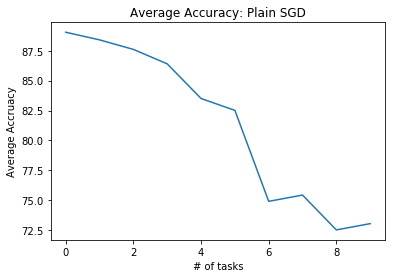

In [11]:
x, y = list(plain_acc.keys()), list(plain_acc.values())
plt.xlabel('# of tasks')
plt.ylabel('Average Accruacy')
plt.title('Average Accuracy: Plain SGD')
plt.plot(x, y)
plt.show()

### L2

In [ ]:
hidden_layer_num = 400
epochs = 20

ld_list = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
#past_task_params = torch.empty(0)
past_task_params = []
l2_acc = {}

net = models.FCNetwork(hidden_layer_num)
crit = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    #past_task_params = past_task_params.cuda()
    net = net.cuda()
    crit = crit.cuda()

optim = torch.optim.SGD(net.parameters(), lr=0.001)    


for ld in ld_list:
    l2_acc_per_ld = {}
    for t in range(num_task):
        train.L2Learning(
            past_task_params = past_task_params,
            dataloader = train_loader[t],
            epochs = epochs,
            optim = optim,
            crit = crit,
            net = net,
            ld = ld
        )

        each_task_acc, acc_mean = eval.eval(
            dataloader = test_loader,
            num_task = t,
            net = net
        )
        print(each_task_acc)
        l2_acc_per_ld[t] = acc_mean
        
    l2_acc[ld] = l2_acc_per_ld

[Epoch 10/20] Loss: 661.806
[Epoch 20/20] Loss: 383.701
[Task 1] avg accuracy: 89.340%
tensor([89.3400], device='cuda:0')
[Epoch 10/20] Loss: 377.541
[Epoch 20/20] Loss: 310.760
[Task 2] avg accuracy: 88.175%
tensor([85.2700, 91.0800], device='cuda:0')
[Epoch 10/20] Loss: 340.400
[Epoch 20/20] Loss: 289.100
[Task 3] avg accuracy: 86.690%
tensor([78.5700, 90.0300, 91.4700], device='cuda:0')
[Epoch 10/20] Loss: 332.016
[Epoch 20/20] Loss: 279.227
[Task 4] avg accuracy: 85.440%
tensor([75.1800, 86.8200, 87.7800, 91.9800], device='cuda:0')
[Epoch 10/20] Loss: 323.801
[Epoch 20/20] Loss: 272.544
[Task 5] avg accuracy: 83.550%
tensor([73.4500, 81.6900, 83.5100, 86.7800, 92.3200], device='cuda:0')
[Epoch 10/20] Loss: 324.190
[Epoch 20/20] Loss: 273.980
[Task 6] avg accuracy: 81.320%
tensor([71.3300, 79.3400, 74.5600, 81.2300, 88.7700, 92.6900], device='cuda:0')
[Epoch 10/20] Loss: 321.945
[Epoch 20/20] Loss: 272.708
[Task 7] avg accuracy: 80.950%
tensor([70.6700, 74.1600, 78.2000, 75.2200, 85

### Fisher